In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time

In [10]:
data = pd.read_excel("C:\\Users\\tamba\\Downloads\\Airlines+Data.xlsx")

In [11]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [12]:
#data["month"] = data.Month.dt.strftime("%b")
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)
indexedDataset = data.set_index(['Month'])

In [13]:
indexedDataset.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


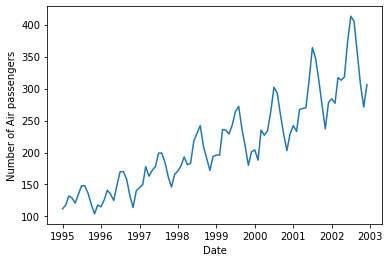

In [14]:
plt.xlabel('Date')
plt.ylabel('Number of Air passengers')
plt.plot(indexedDataset)

In [15]:
#Determining rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


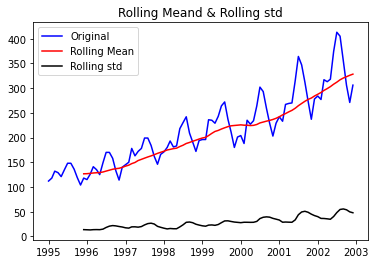

In [16]:
#plot rolling statistics
orig = plt.plot(indexedDataset,color='blue',label='Original')
mean = plt.plot(rolmean, color='red',label='Rolling Mean')
std = plt.plot(rolstd, color = 'black',label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Meand & Rolling std')
plt.show(block=False)

In [18]:
#perform Dickey-fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey fuller test:')
dftest = adfuller(indexedDataset['Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)    

Results of Dickey fuller test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


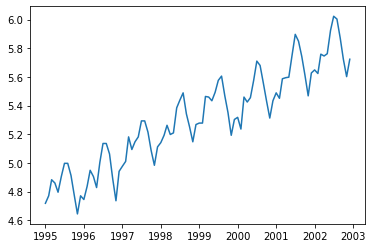

In [19]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

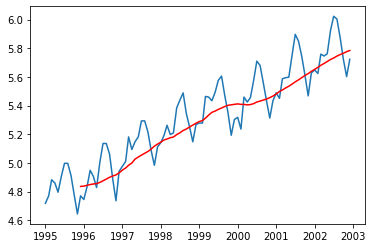

In [20]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [21]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove Nan values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)

In [22]:
datasetLogScaleMinusMovingAverage.head()

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142


In [25]:
def test_stationary(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(windows=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig = plt.plot(timeseries,color='blue',label='Original')
    mean = plt.plot(movingAverage,color='red',label='Rolling Mean')
    std = plt.plot(movingSTD,color='black',label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    print('Results of Dickey fuller test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    
    print(dfoutput) 
    

In [28]:
test_stationarity(datasetLogScaleMinusMovingAverage)

NameError: name 'test_stationarity' is not defined

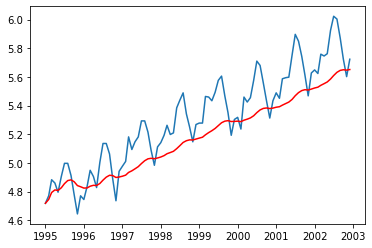

In [29]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In [31]:
datasetLogScaleMinusMovingExponentDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

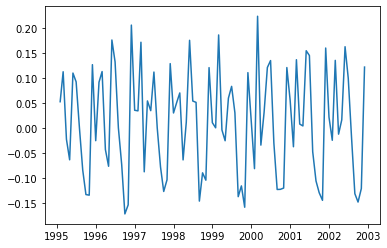

In [33]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [34]:
datasetLogDiffShifting.dropna(inplace=True)

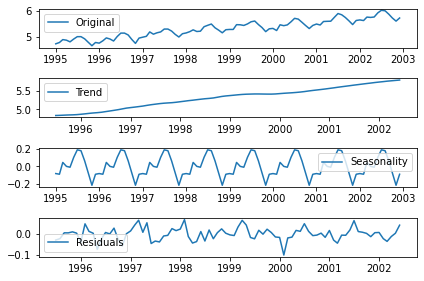

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal= decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decompositionLogData = residual
decompositionLogData.dropna(inplace = True)







In [37]:
decompositionLogData = residual
decompositionLogData.dropna(inplace=True)


C:\Users\tamba\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


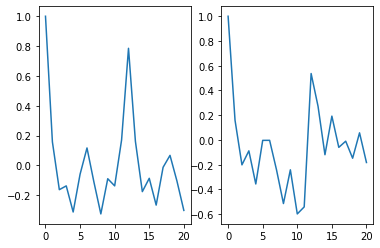

In [40]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting,nlags=20)
lag_pacf = pacf(datasetLogDiffShifting,nlags=20,method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)


#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)




C:\Users\tamba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\tamba\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting AR Model


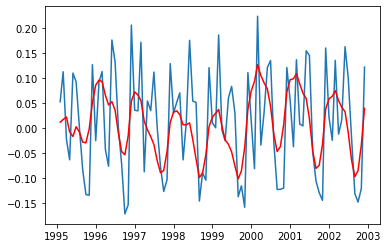

In [42]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale,order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
print('plotting AR Model')

In [45]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)

In [46]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()


In [52]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].iloc[0], index =indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

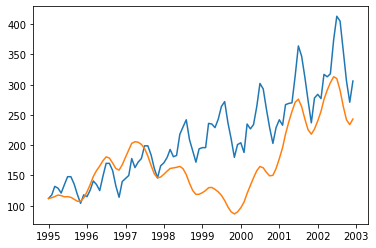

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

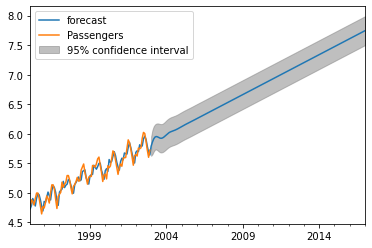

In [56]:
results_AR.plot_predict(1,264)
x=results_AR.forecast(steps=120)

In [57]:
x[1]

array([0.08322163, 0.10431788, 0.10877063, 0.10877422, 0.11128025,
       0.1161453 , 0.12023297, 0.12203349, 0.12227818, 0.1223405 ,
       0.12285384, 0.12358115, 0.12409162, 0.1242662 , 0.12427413,
       0.12430382, 0.12440149, 0.12450811, 0.12456848, 0.12458264,
       0.12458267, 0.12459159, 0.12460917, 0.12462445, 0.12463139,
       0.12463237, 0.12463258, 0.12463443, 0.12463707, 0.12463891,
       0.1246395 , 0.12463952, 0.12463967, 0.1246401 , 0.12464057,
       0.12464084, 0.12464092, 0.12464092, 0.12464094, 0.12464099,
       0.12464103, 0.12464104, 0.12464104, 0.12464105, 0.12464106,
       0.12464108, 0.1246411 , 0.12464111, 0.12464111, 0.12464111,
       0.12464111, 0.12464111, 0.12464111, 0.12464111, 0.12464111,
       0.12464112, 0.12464112, 0.12464112, 0.12464113, 0.12464113,
       0.12464113, 0.12464113, 0.12464113, 0.12464113, 0.12464113,
       0.12464114, 0.12464114, 0.12464114, 0.12464114, 0.12464114,
       0.12464114, 0.12464115, 0.12464115, 0.12464115, 0.12464

In [58]:
len(x[1])

120